In [1]:
import pandas as pd

#### 실습하기
1. drinks.csv
2. 결측치
3. continent 결측치는 OT로 변경
4. continent별 spirit_saving컬럼의 평균최대최소합출력
5. 바형 그래프 출력
6. total_liters_of_pure_alcohol 컬럼 평균보다 높은 continent 어딘지 출력

In [88]:
drink_data  = pd.read_csv('../practice1/data/drinks.csv')

In [89]:
drink = drink_data.copy()
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [91]:
drink.fillna("OT",inplace= True)
drink.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [100]:
name_list = drink["continent"].unique()
name_list

array(['AS', 'EU', 'AF', 'OT', 'SA', 'OC'], dtype=object)

In [101]:
mean = drink.groupby(['continent']).mean()['spirit_servings']
sum = drink.groupby(['continent']).sum()['spirit_servings']
max = drink.groupby(['continent']).max()['spirit_servings']
min = drink.groupby(['continent']).min()['spirit_servings']

In [102]:
import matplotlib.pyplot as plt

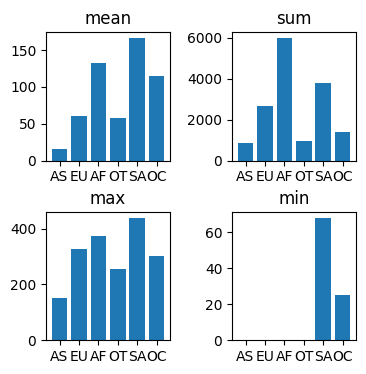

In [103]:
plt.figure(figsize=(4,4))
plt.subplots_adjust(wspace=0.5, hspace=0.4)


plt.subplot(2, 2, 1)
plt.bar(name_list,mean)
plt.title("mean")

plt.subplot(2, 2, 2)
plt.bar(name_list,sum)
plt.title("sum")

plt.subplot(2, 2, 3)
plt.bar(name_list,max)
plt.title('max')

plt.subplot(2, 2, 4)
plt.bar(name_list, min)
plt.title('min')

plt.show()


In [122]:
alcohol_group_mean = drink.groupby(['continent']).mean()['total_litres_of_pure_alcohol']
group_df = pd.DataFrame(alcohol_group_mean)
group_df

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [118]:
alcohol_mean = drink['total_litres_of_pure_alcohol'].mean()
alcohol_mean 


4.717098445595855

In [129]:
continent_list2 = []
for i in range(0,len(group_df)+1):
    if group_df['total_litres_of_pure_alcohol'] > alcohol_mean :
        continent_list2.append(group_df.index)
    else:
        continue

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [105]:
continent_list = []
for i in range(len(drink)):
    if drink['total_litres_of_pure_alcohol'][i] > alcohol_mean :
        continent_list.append(drink['continent'][i])
    else:
        continue



In [112]:
set(continent_list)

{'AF', 'AS', 'EU', 'OC', 'OT', 'SA'}

In [113]:
name_list

array(['AS', 'EU', 'AF', 'OT', 'SA', 'OC'], dtype=object)

In [114]:
mean

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
OT    165.739130
SA    114.750000
Name: spirit_servings, dtype: float64